In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
df.shape, df.columns

((1338, 7),
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object'))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Distribution Visualisations

In [5]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

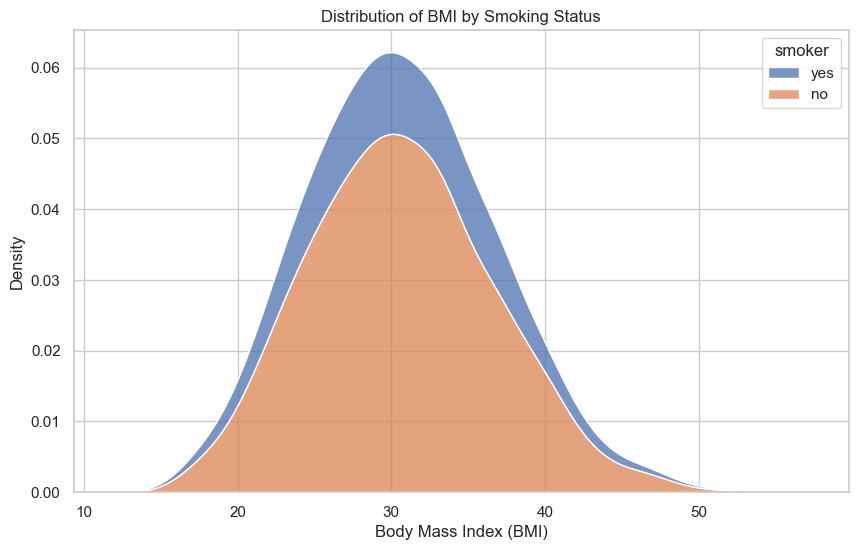

In [6]:
# Creating a Kernel Density Estimate (KDE) plot for the distribution of BMI
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="bmi", hue="smoker", multiple="stack")
plt.title('Distribution of BMI by Smoking Status')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Density')
plt.show()

The KDE plot visualizes the distribution of Body Mass Index (BMI) separated by smoking status. It reveals how the BMI distribution compares between smokers and non-smokers, with the area under the curve representing the density of the distribution. Such visualizations are valuable for understanding the distribution and density of continuous data, highlighting differences between groups.

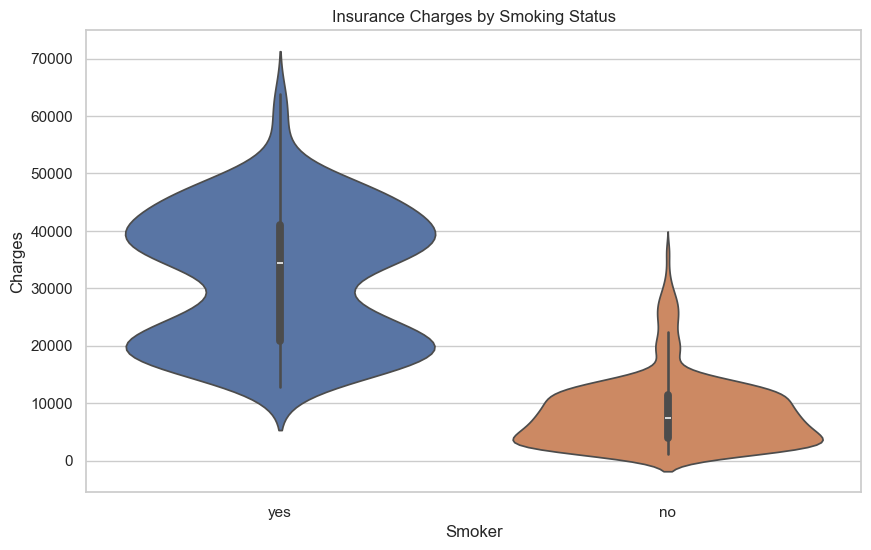

In [8]:
# Creating a Violin Plot to compare charges by smoker status
plt.figure(figsize=(10, 6))
sns.violinplot(x="smoker", y="charges", data=df, hue="smoker")
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

The violin plot combines aspects of box plots and KDE plots, showing the distribution of insurance charges for smokers versus non-smokers. It offers a deeper look into the data distribution, showing both the summary statistics (like the median) and the density of the data at different values. This plot is particularly useful for comparing the distribution of a variable across different categories.

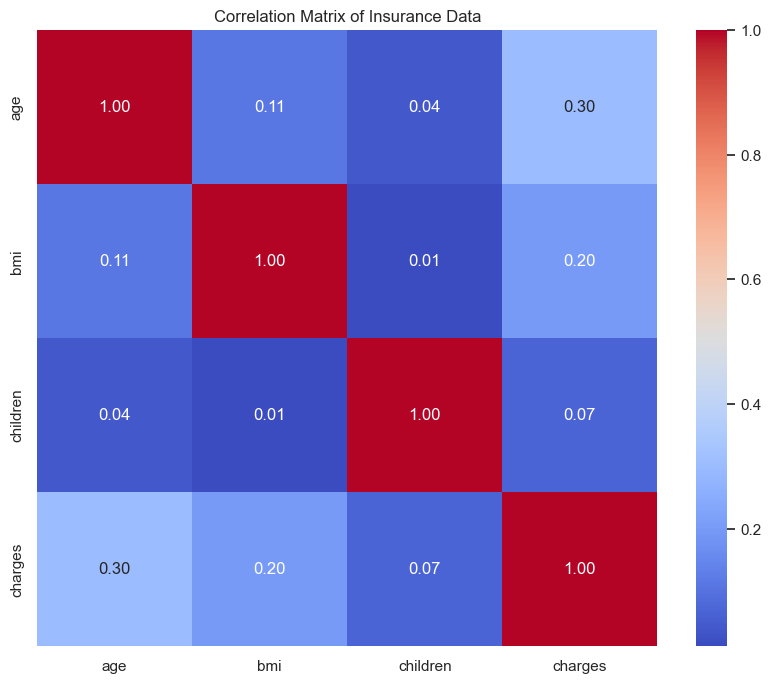

In [9]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
corr = numeric_df.corr()  # Calculate correlation

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Insurance Data')
plt.show()

The heatmap visualizes the correlation matrix of the dataset, providing insights into how different variables relate to each other. Correlation coefficients range from -1 to 1, where values closer to 1 or -1 indicate a strong positive or negative correlation, respectively, and values near 0 indicate no linear relationship. This visualization helps in identifying potential predictors for modeling and understanding the relationships within the data.

# Multidimensional Data Visualization

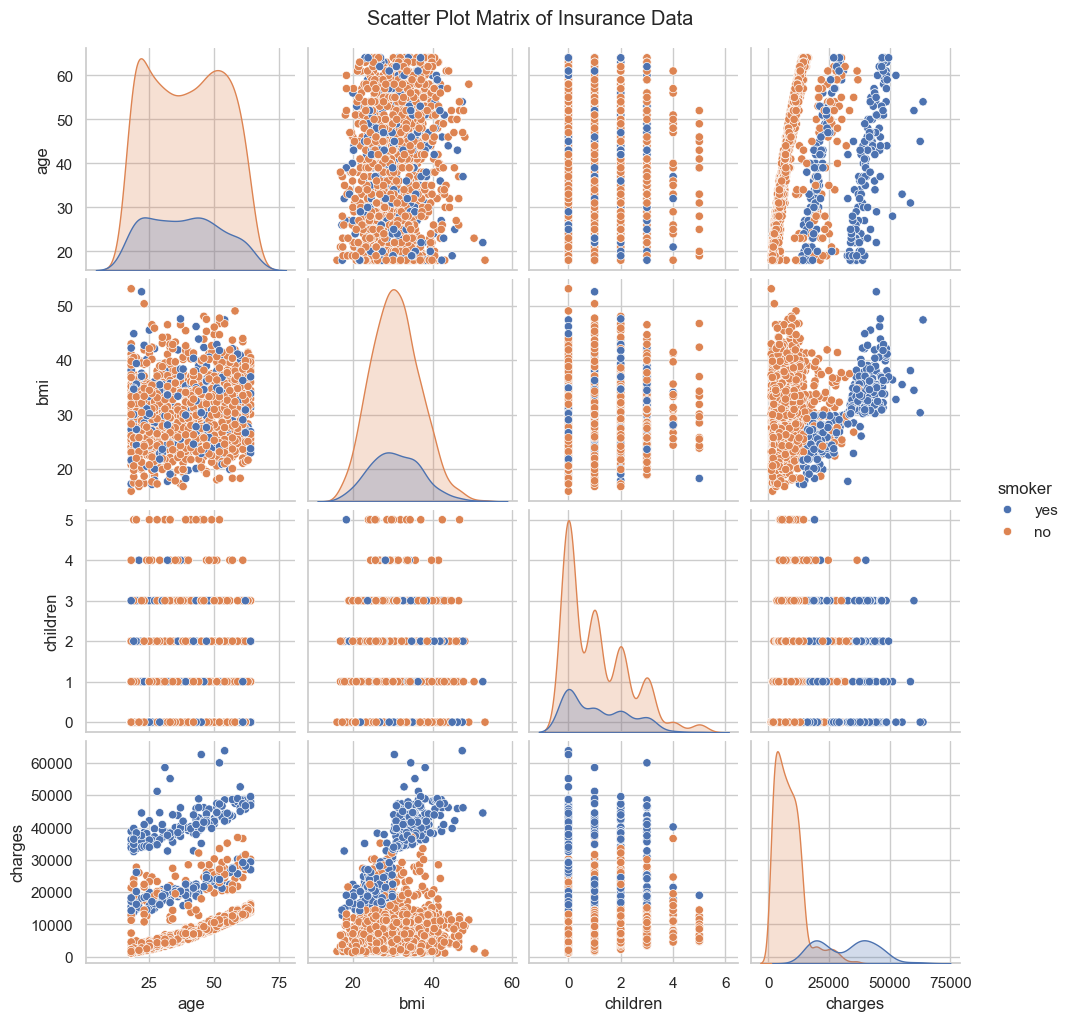

In [10]:
sns.pairplot(df, hue="smoker", diag_kind="kde")
plt.suptitle('Scatter Plot Matrix of Insurance Data', y=1.02)
plt.show()

# Insights

Drawing insights from advanced visualizations involves interpreting the patterns, trends, and anomalies revealed through the plots.

### Insights from the KDE Plot (BMI Distribution by Smoking Status)

The KDE plot shows distinct distributions of BMI for smokers and non-smokers. If the plot indicated smokers tend to have higher or lower BMI values compared to non-smokers, this could suggest a relationship between smoking habits and BMI. Such insights could be valuable for health insurance companies in assessing risk factors.

### Insights from the Violin Plot (Insurance Charges by Smoker Status)

The violin plot highlights the significant difference in insurance charges between smokers and non-smokers, with smokers facing higher charges on average. This visualization underscores smoking as a potential risk factor leading to higher insurance costs. The width of the violin plot also indicates the distribution of charges, revealing that while non-smokers generally incur lower charges, the variation in charges among smokers is more pronounced, indicating higher risk and possibly higher medical expenses.

### Insights from the Heatmap (Correlation Matrix)

The heatmap of the correlation matrix helps identify which variables are most strongly related to insurance charges. For instance, if there's a strong positive correlation between age or BMI and charges, it suggests that older individuals or those with higher BMI tend to have higher insurance costs. Such insights are crucial for understanding the factors that most significantly impact insurance charges and can guide further statistical analysis or predictive modeling.

### Insights from the Scatter Plot Matrix

The scatter plot matrix offers a broader view of the interactions between multiple variables. For example, it might reveal that charges increase with age or that there's a cluster of high charges associated with smokers, which aligns with the insights from the violin plot. This comprehensive view helps in hypothesizing about causal relationships or identifying variables for inclusion in predictive models.

# Exercise

Try to answer these questions with the given insights:
* How do other factors, like region or the number of children, impact insurance charges?
* Are there interaction effects between smoking status and BMI on insurance charges?
* How might these insights inform the development of insurance policies or health interventions?

# Framework for data analysis

### 1. Formulate a Hypothesis

Begin with a question or observation about the dataset. For example, "Does smoking status impact insurance charges?" or "Is there a relationship between BMI and insurance charges?"

### 2. Choose the Right Visualization Technique

Based on the hypothesis, select an appropriate visualization method. If comparing groups, consider violin plots or box plots. For exploring relationships, scatter plots or heatmaps might be more suitable.

### 3. Analyze the Visualization

Carefully examine the visual output for any patterns, trends, or anomalies. Note any surprising findings or confirmations of your initial hypothesis.

### 4. Draw Preliminary Conclusions

Based on your observations, formulate answers to your initial question. Consider the implications of these findings and any limitations of the visual analysis.

### 5. Test Further

If possible, conduct statistical tests to validate your findings. Alternatively, consider creating more detailed visualizations or using different subsets of the data for further exploration.